# Title

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Site count per year in types/context date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Plot line graphs</span>](#4) <a id="four"></a>   

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [2]:
import sys

sys.path.append("../sonata")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import year_object_count_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [3]:
data = pd.read_csv("../../data/Sonata_data_main.csv") 

column_names = ["Site", "Grouped_sites"]

start_dates = ["Amphora_type_lower_date", "Lower_context_date"]
end_dates = ["Amphora_type_upper_date", "Upper_context_date"]

site_count_type_dates = {}
site_count_context_dates = {}

list_of_dfs = []

### [<span style="color:black">3. Site count per year in types/context date ranges</span>](#three) <a id="3"></a>  

In [4]:
for column in column_names:
    for start, end in zip(start_dates, end_dates):

        df = data.groupby(["Amphora_type", start, end])[column].apply(lambda x: ','.join(x))
        df = df.apply(lambda x: x.split(','))
        df = df.reset_index()
        df = df.rename(columns = {column:"List_of_sites"})
        
        count_sites = year_object_count_df(data = df,
                                          lower_date = start,  
                                          upper_date = end,
                                          object_list = "List_of_sites") 

        if "Amphora" in start or "Amphora" in end:   
            site_count_type_dates[column] = count_sites

        else:
            site_count_context_dates[column] = count_sites

list_of_dfs.append(site_count_type_dates)
list_of_dfs.append(site_count_context_dates)

### [<span style="color:black">4. Plot line graphs</span>](#four) <a id="4"></a>

/tmp/ipykernel_10176/4196159524.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
/tmp/ipykernel_10176/4196159524.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


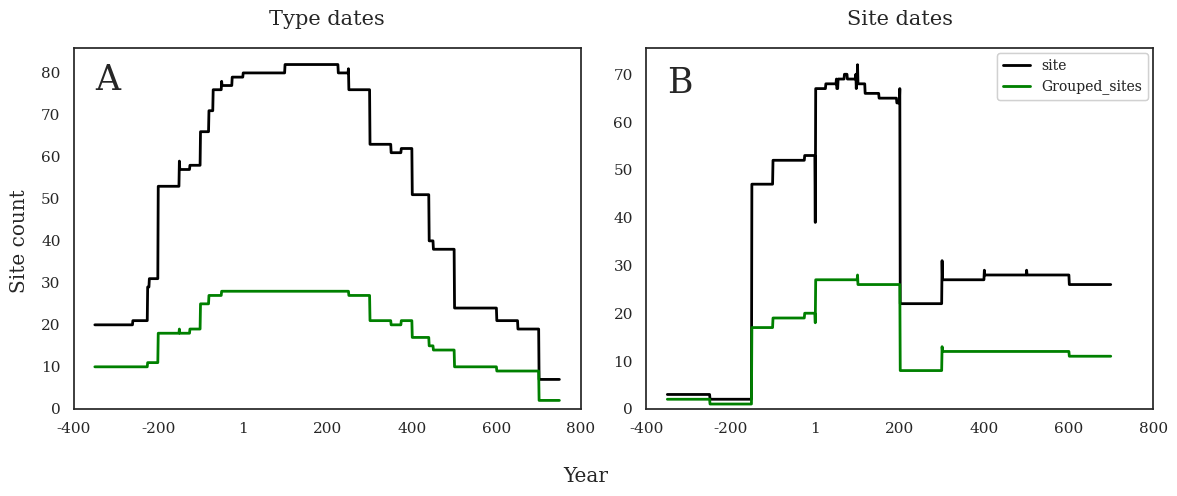

In [36]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"})  

fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].set_xlim([-400, 800])
axs[1].set_xlim([-400, 800])

for ax, df in zip(axs.ravel(), list_of_dfs):
    plot_graph(dicts_of_df = df,
               palette=["black", "green"],
               ax = ax,
               linewidth = 2)

    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xlabel(None)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    handles, labels = ax.get_legend_handles_labels() 
    fig.legend(handles, labels, bbox_to_anchor=(0.974, 0.89), fontsize = 10)

axs[0].set_title(label = "Type dates", y=1.04, size=15)
axs[1].set_title(label = "Site dates", y=1.04, size=15)

axs[0].text(-350, 76, "A", fontsize = 25)
axs[1].text(-350, 66, "B", fontsize = 25)

fig.supxlabel("Year")
fig.supylabel("Site count")

plt.tight_layout()
plt.savefig("../../figs/Fig2a-b.png", bbox_inches="tight")